
# Project: Investigate TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue

In [1]:
# Import useful libraries for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
# Importing dataset for this project
data = pd.read_csv('data.csv')
data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, I will check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties/ General Inspection

In [3]:
#check the shape
print(f"the dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

the dataset contains 10866 rows and 21 columns


> the dataset contains **10866** rows and **21** columns

In [4]:
#check the features and the variables types for proper cleaning and adjustment for analysis
data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

> from the investigation on the features and variables types the budget and revenue features ought to be in float type to ensure uniformity between them and thier inflation counterpart incase of any analysis between then, also money should be in floats
Also release date and time features will be converted to datetime for proper analysis

In [5]:
#check for missing values
(data.isna().sum()/data.shape[0])*100

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

> from the missing values of the respective columns, homepage have over 50 percent of its row missing, which in conclusion we can drop the columns

In [6]:
#check for duplicate rows
data.duplicated().sum()

1

> from the duplicate investigation, just one duplicates was found, which will be dropped during our cleaning

In [7]:
#check for unique entities in each categorical column
data.director.nunique()

5067

In [8]:
genres_rows =  [x for x in list(data.genres) if str(x) != 'nan']
unique_genres = list(set('|'.join(genres_rows).split('|')))
len(unique_genres)

20

In [9]:
cast_rows =  [x for x in list(data.cast) if str(x) != 'nan']
unique_cast = list(set('|'.join(cast_rows).split('|')))
len(unique_cast)

19026

In [10]:
production_companies_rows =  [x for x in list(data.production_companies) if str(x) != 'nan']
unique_production_companies = list(set('|'.join(production_companies_rows).split('|')))
len(unique_production_companies)

7879

> from the unique invesigation we have **5067** uique directors, **20** unique genres,**19026** unique cast and **7879** production companies across the different movies

### Data Cleaning 

In [11]:
#Converting to the proper column stype to avoid issues during our exploration and analysis
data.id = data.id.astype(str)
data.budget = data.budget.astype(float)
data.revenue = data.revenue.astype(float)
data.release_date = pd.to_datetime(data.release_date)
data.release_year = data.release_year.astype(str)
data['release_month'] = data.release_date.dt.month_name()
data['release_day_of_week'] = data.release_date.dt.day_name()

In [12]:
#drop irrelevant columns and columns with high missing values
data.drop(['homepage'],axis=1,inplace=True)

> My data cleaning operation that for future data exploration and analysis include
1. Converted id column to string type
2. Converted budget and revenue columns to float type
3. Converted release date column to datetime
4. Extracted month and day of the week from the release date column
5. Dropped irrelevant column

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Here i will compute statistics and create visualizations with the goal of addressing certain research questions.

### Research Question 1 (Statistical Description of the numerical columns)

In [13]:
data.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


<AxesSubplot:>

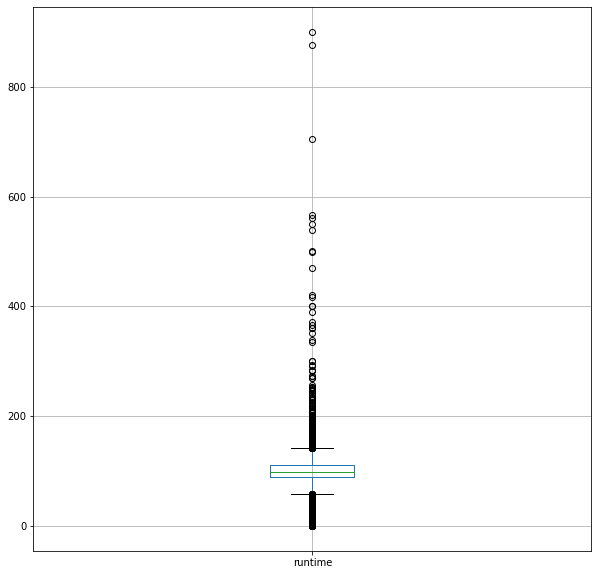

In [15]:
data.boxplot(column=['runtime'],figsize=[10,10])

<AxesSubplot:>

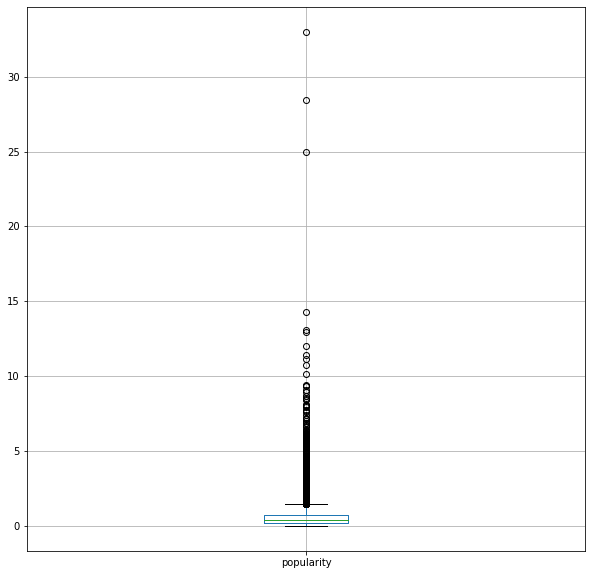

In [16]:
data.boxplot(column=['popularity'],figsize=[10,10])

<AxesSubplot:>

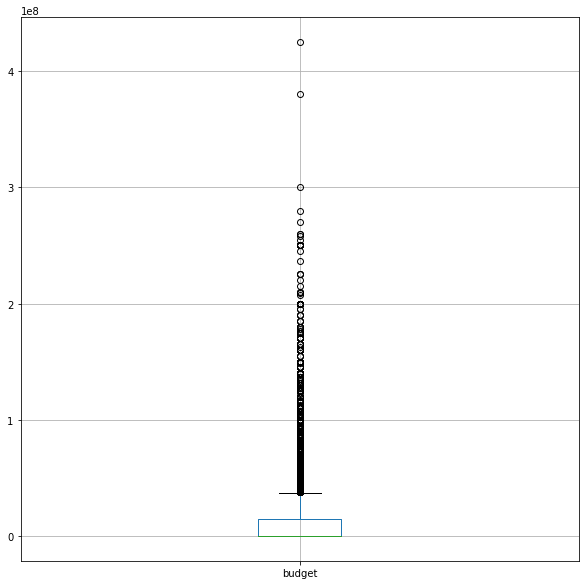

In [17]:
data.boxplot(column=['budget'],figsize=[10,10])

<AxesSubplot:>

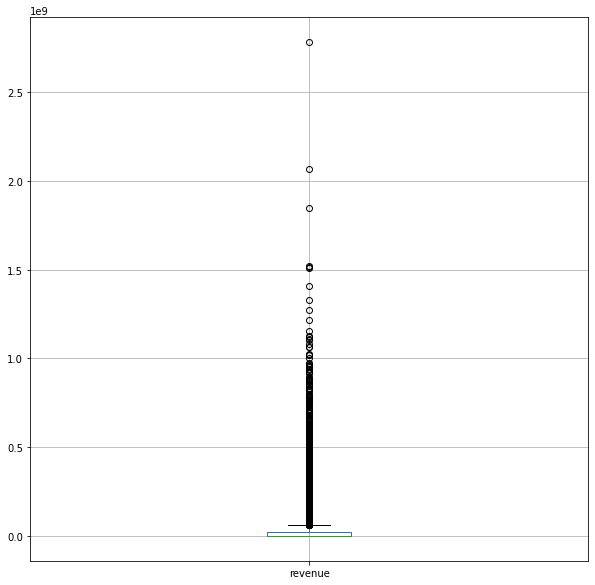

In [18]:
data.boxplot(column=['revenue'],figsize=[10,10])

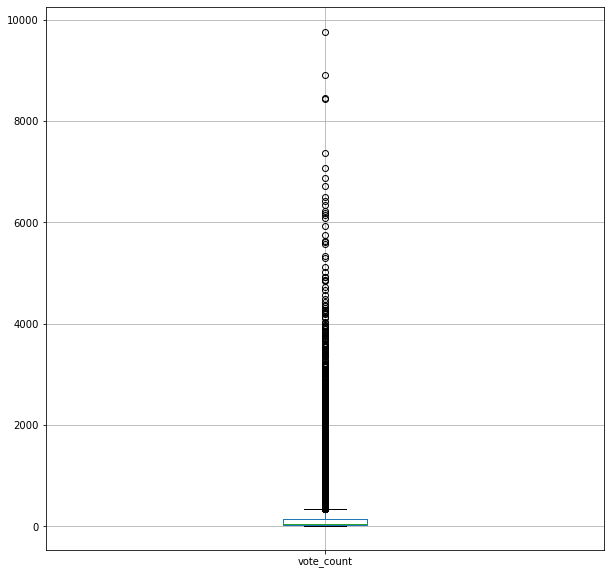

In [19]:
boxplot = data.boxplot(column=['vote_count'],figsize=[10,10])

<AxesSubplot:>

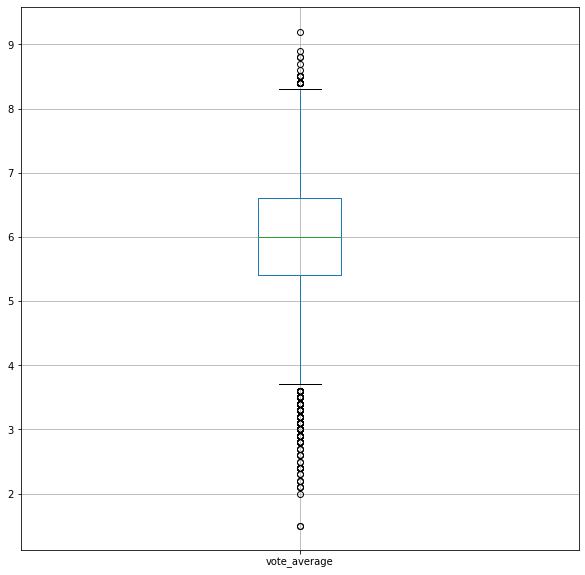

In [20]:
data.boxplot(column=['vote_average'],figsize=[10,10])

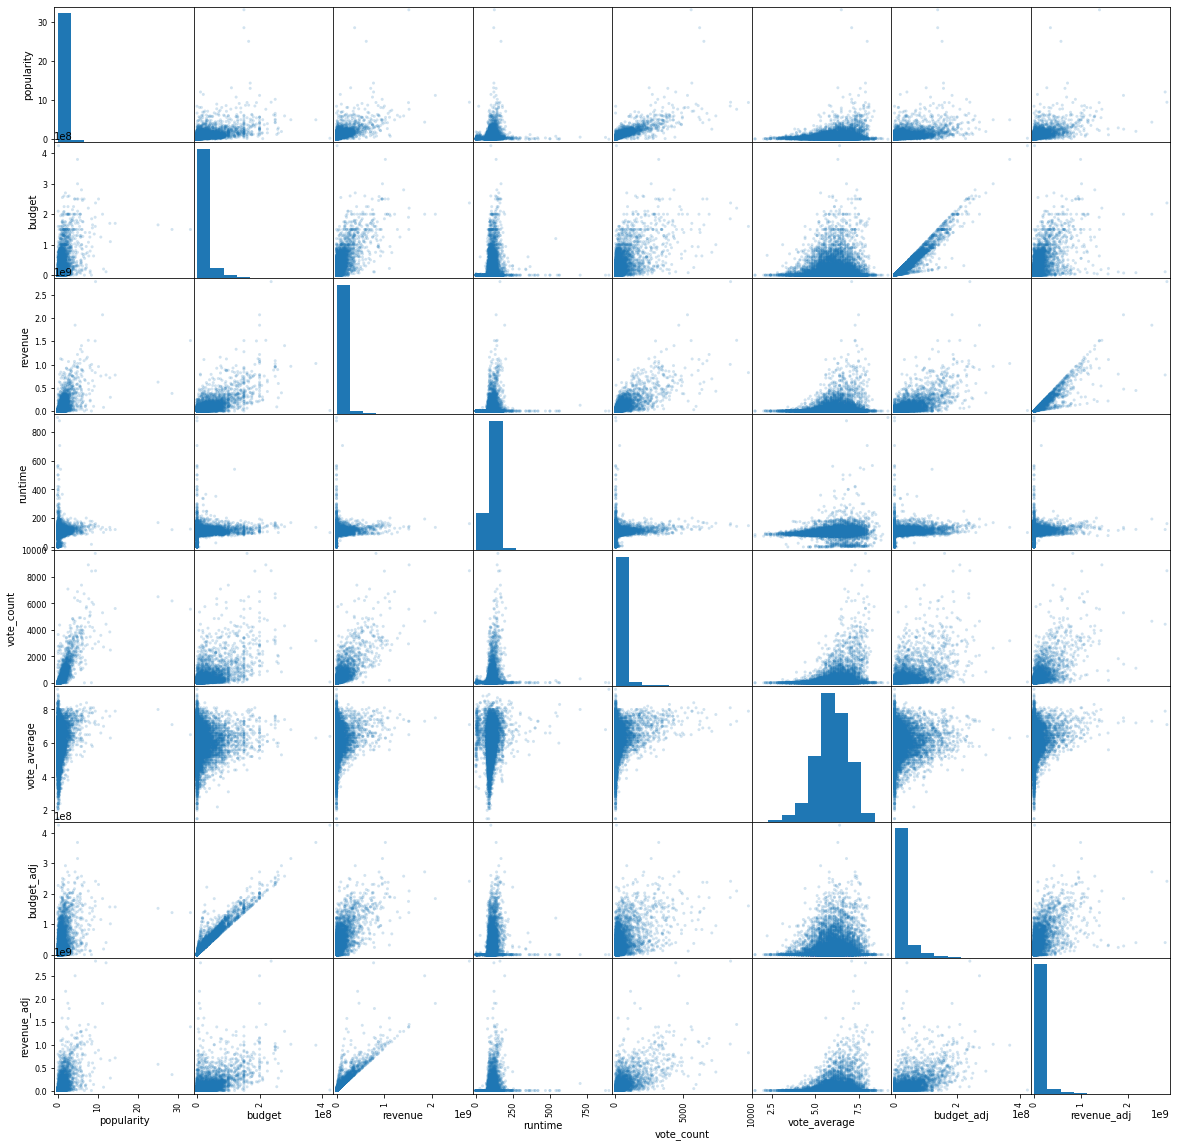

In [21]:
pd.plotting.scatter_matrix(data, alpha=0.2,figsize=[20,20]);

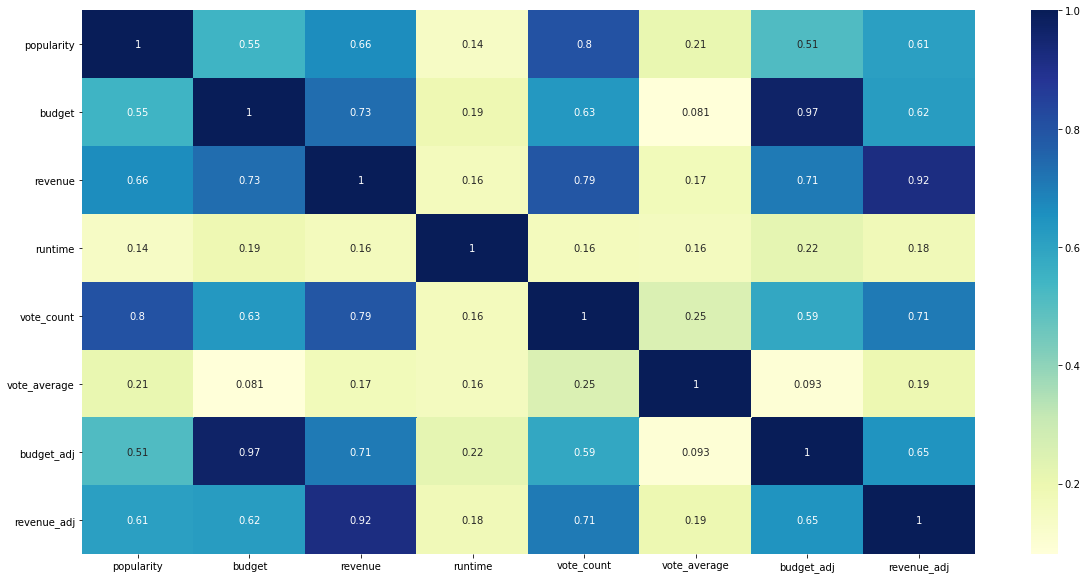

In [22]:
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True,ax=ax);

### Research Question 2  (Top 10 movies with highest Revenue)

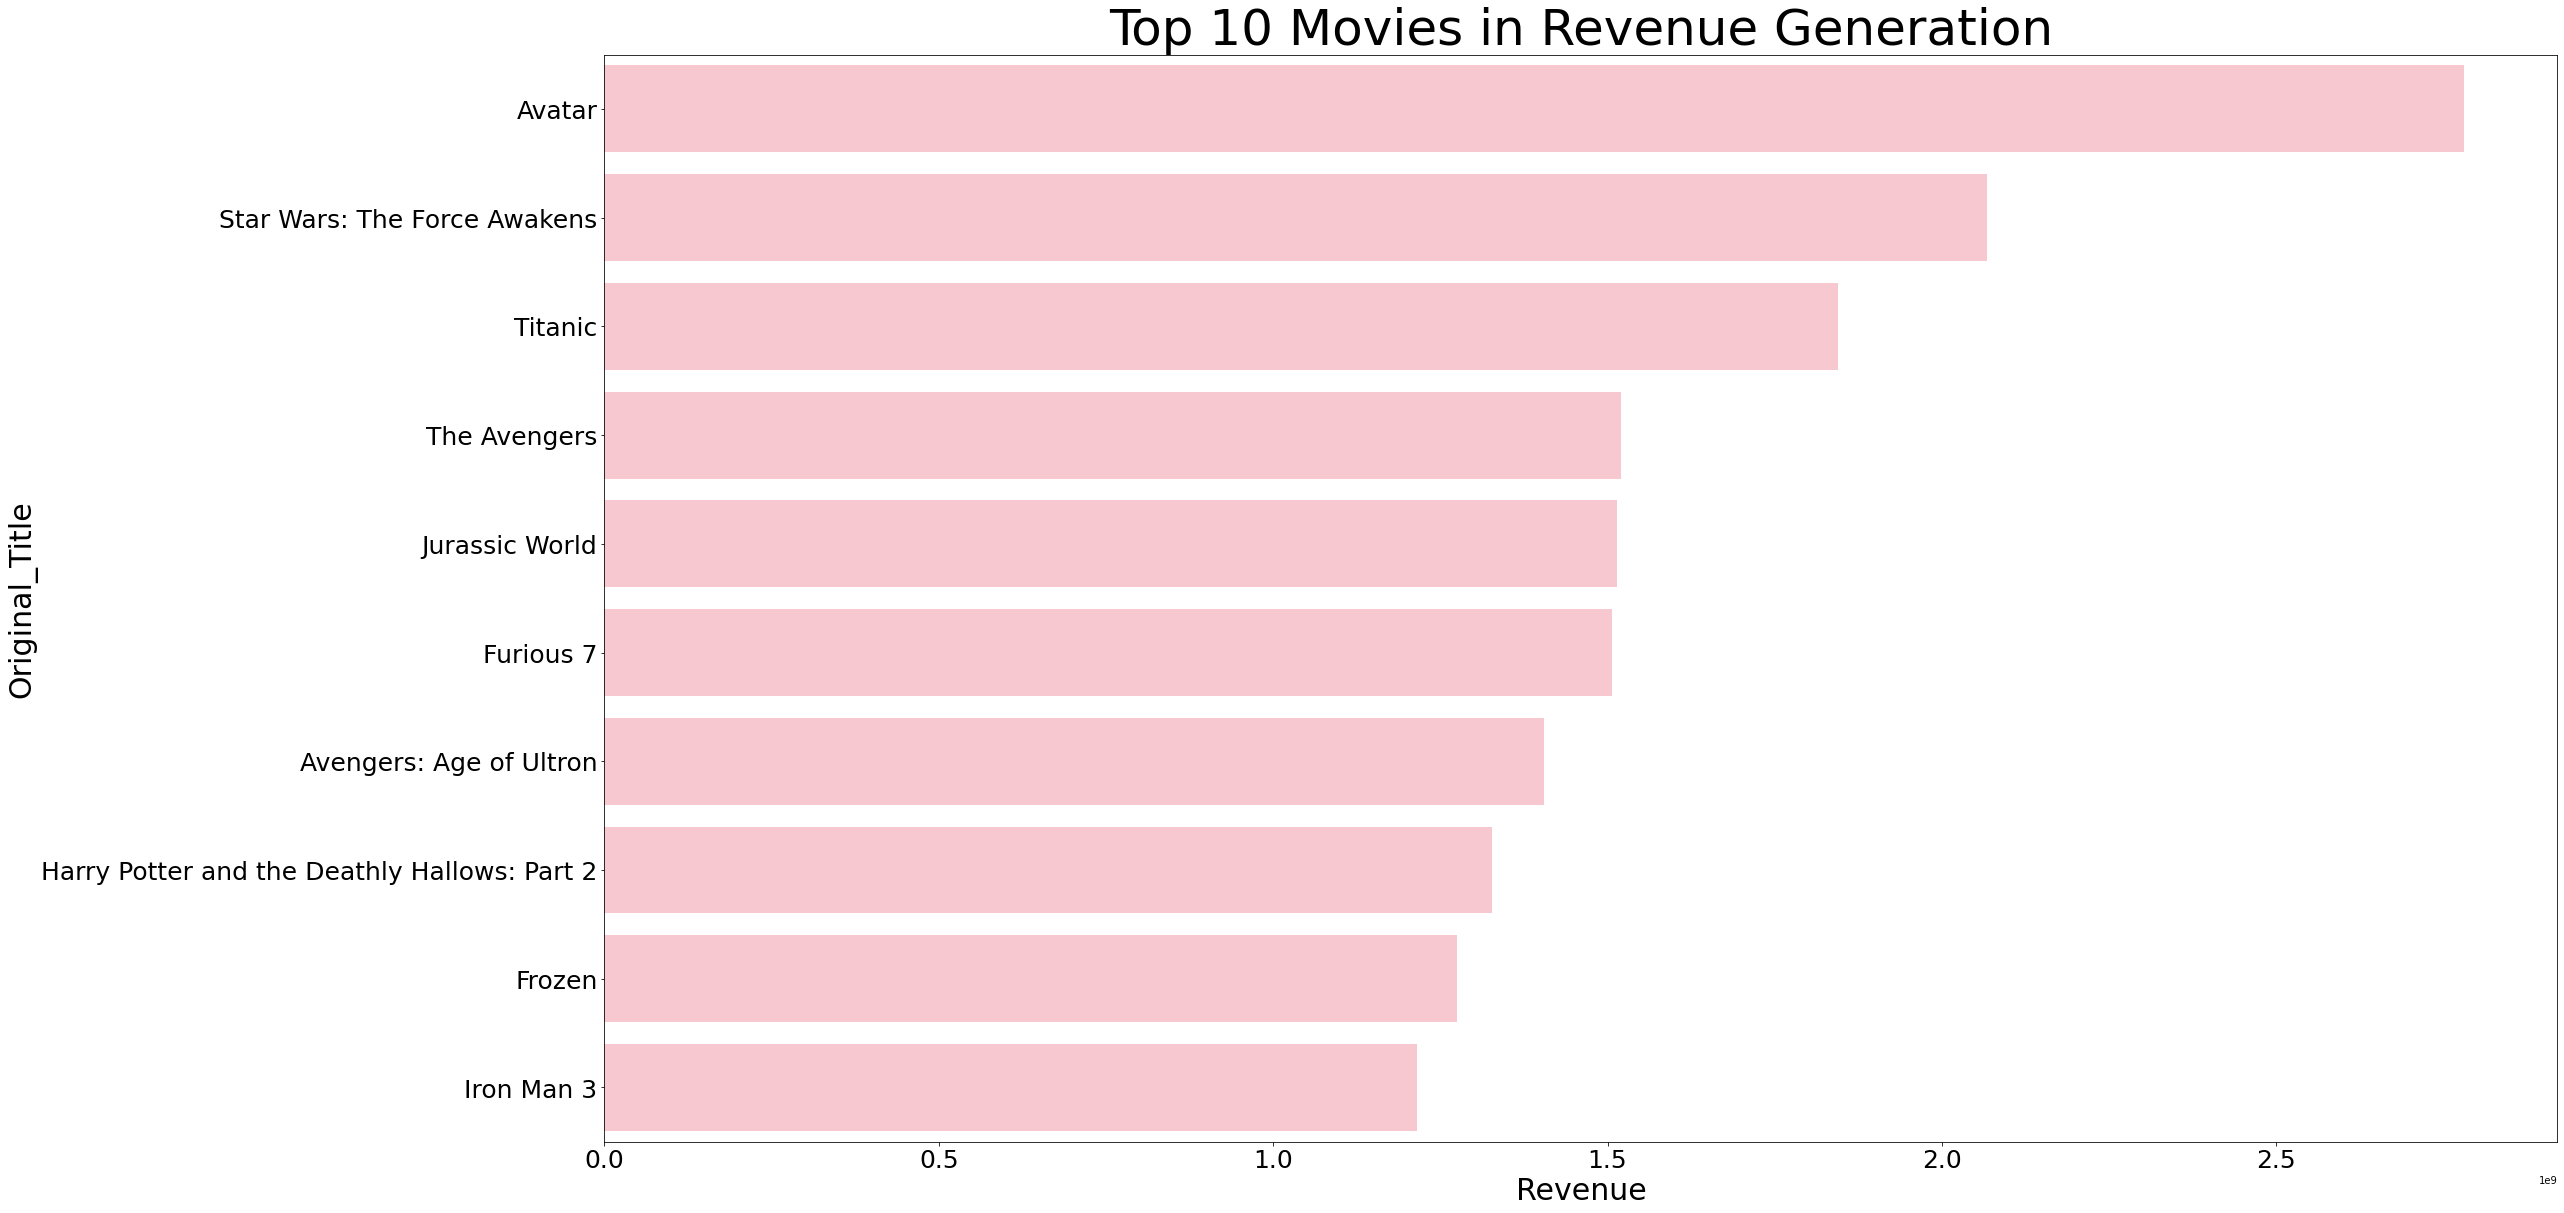

In [23]:
# extracting movies with highest revenue generation
top_10_revenue = data.sort_values('revenue',ascending=False).head(10)

#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
b = sns.barplot(x = 'revenue',y = 'original_title',data = top_10_revenue,ax=ax,color="pink")
b.axes.set_title("Top 10 Movies in Revenue Generation",fontsize=50)
b.set_xlabel("Revenue",fontsize=30)
b.set_ylabel("Original_Title",fontsize=30)
b.tick_params(labelsize=25)
plt.show()

### Research Question 3 (movies with no information on revenue)

In [24]:
no_revenue = data.query("revenue == 0")

print(f"{(len(no_revenue)/len(data))*100} percent of the movies have no information on revenue generation")

55.365359838026876 percent of the movies have no information on revenue generation


> **55%**  of the movies have no information on revenue generation

### Research Question 4  (Top 10 cast with highest features)

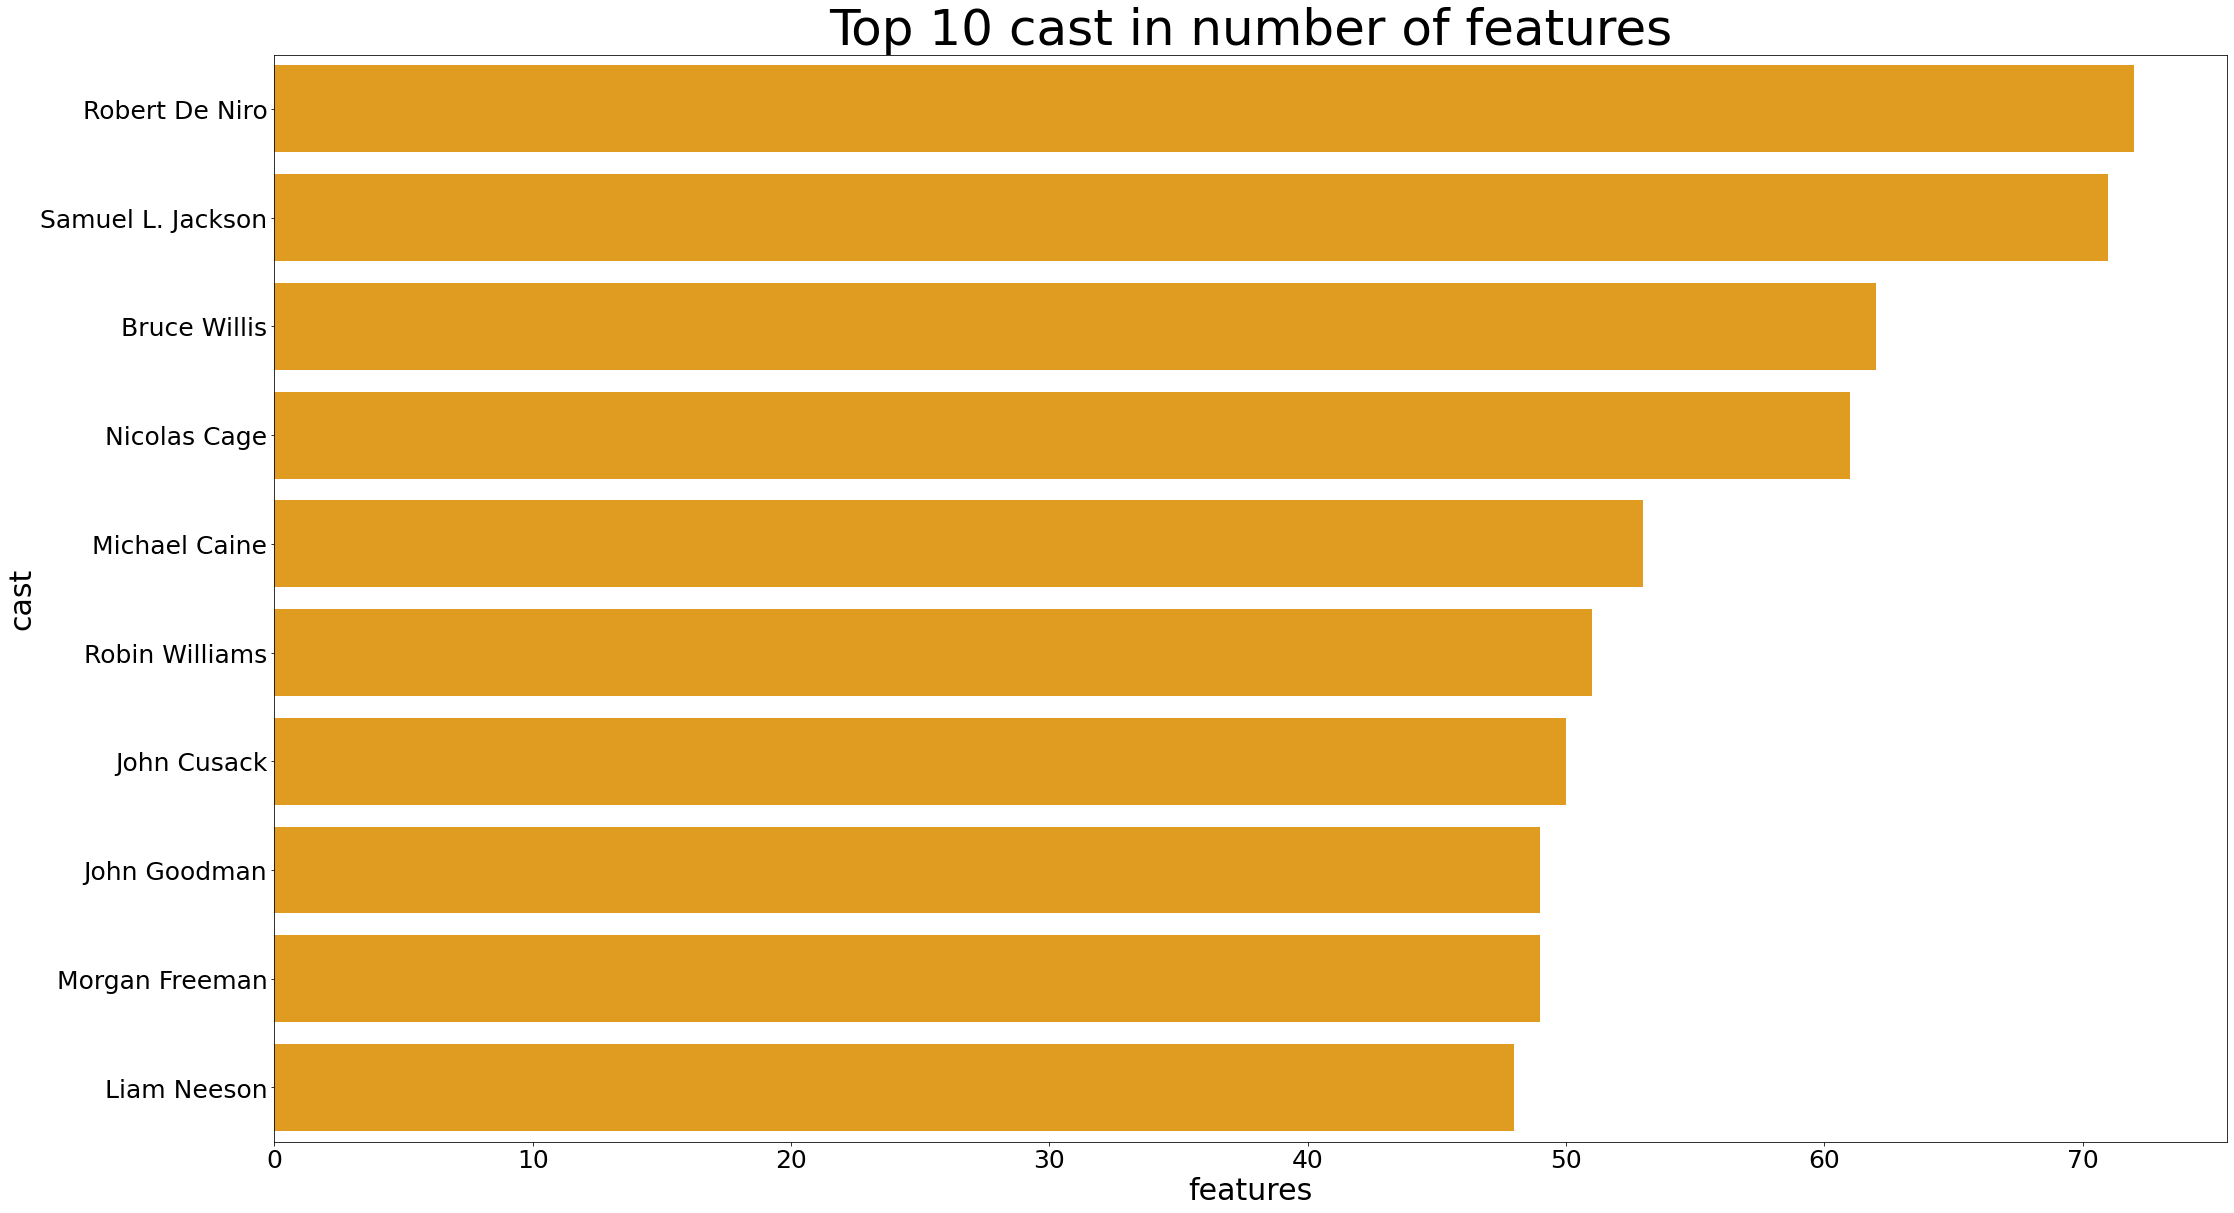

In [25]:
# extracting cast with highest features
cast_features = Counter(list('|'.join(cast_rows).split('|')))
cast_features_df = pd.DataFrame(cast_features.items(), columns=['cast_name', 'no_features'])
top_10_cast_features = cast_features_df.sort_values('no_features',ascending=False).head(10)


#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
b = sns.barplot(x = 'no_features',y = 'cast_name',data = top_10_cast_features,ax=ax,color='orange')
b.axes.set_title("Top 10 cast in number of features",fontsize=50)
b.set_xlabel("features",fontsize=30)
b.set_ylabel("cast",fontsize=30)
b.tick_params(labelsize=25)
plt.show()

### Research Question 5  (Top 10 genres across the various movies)

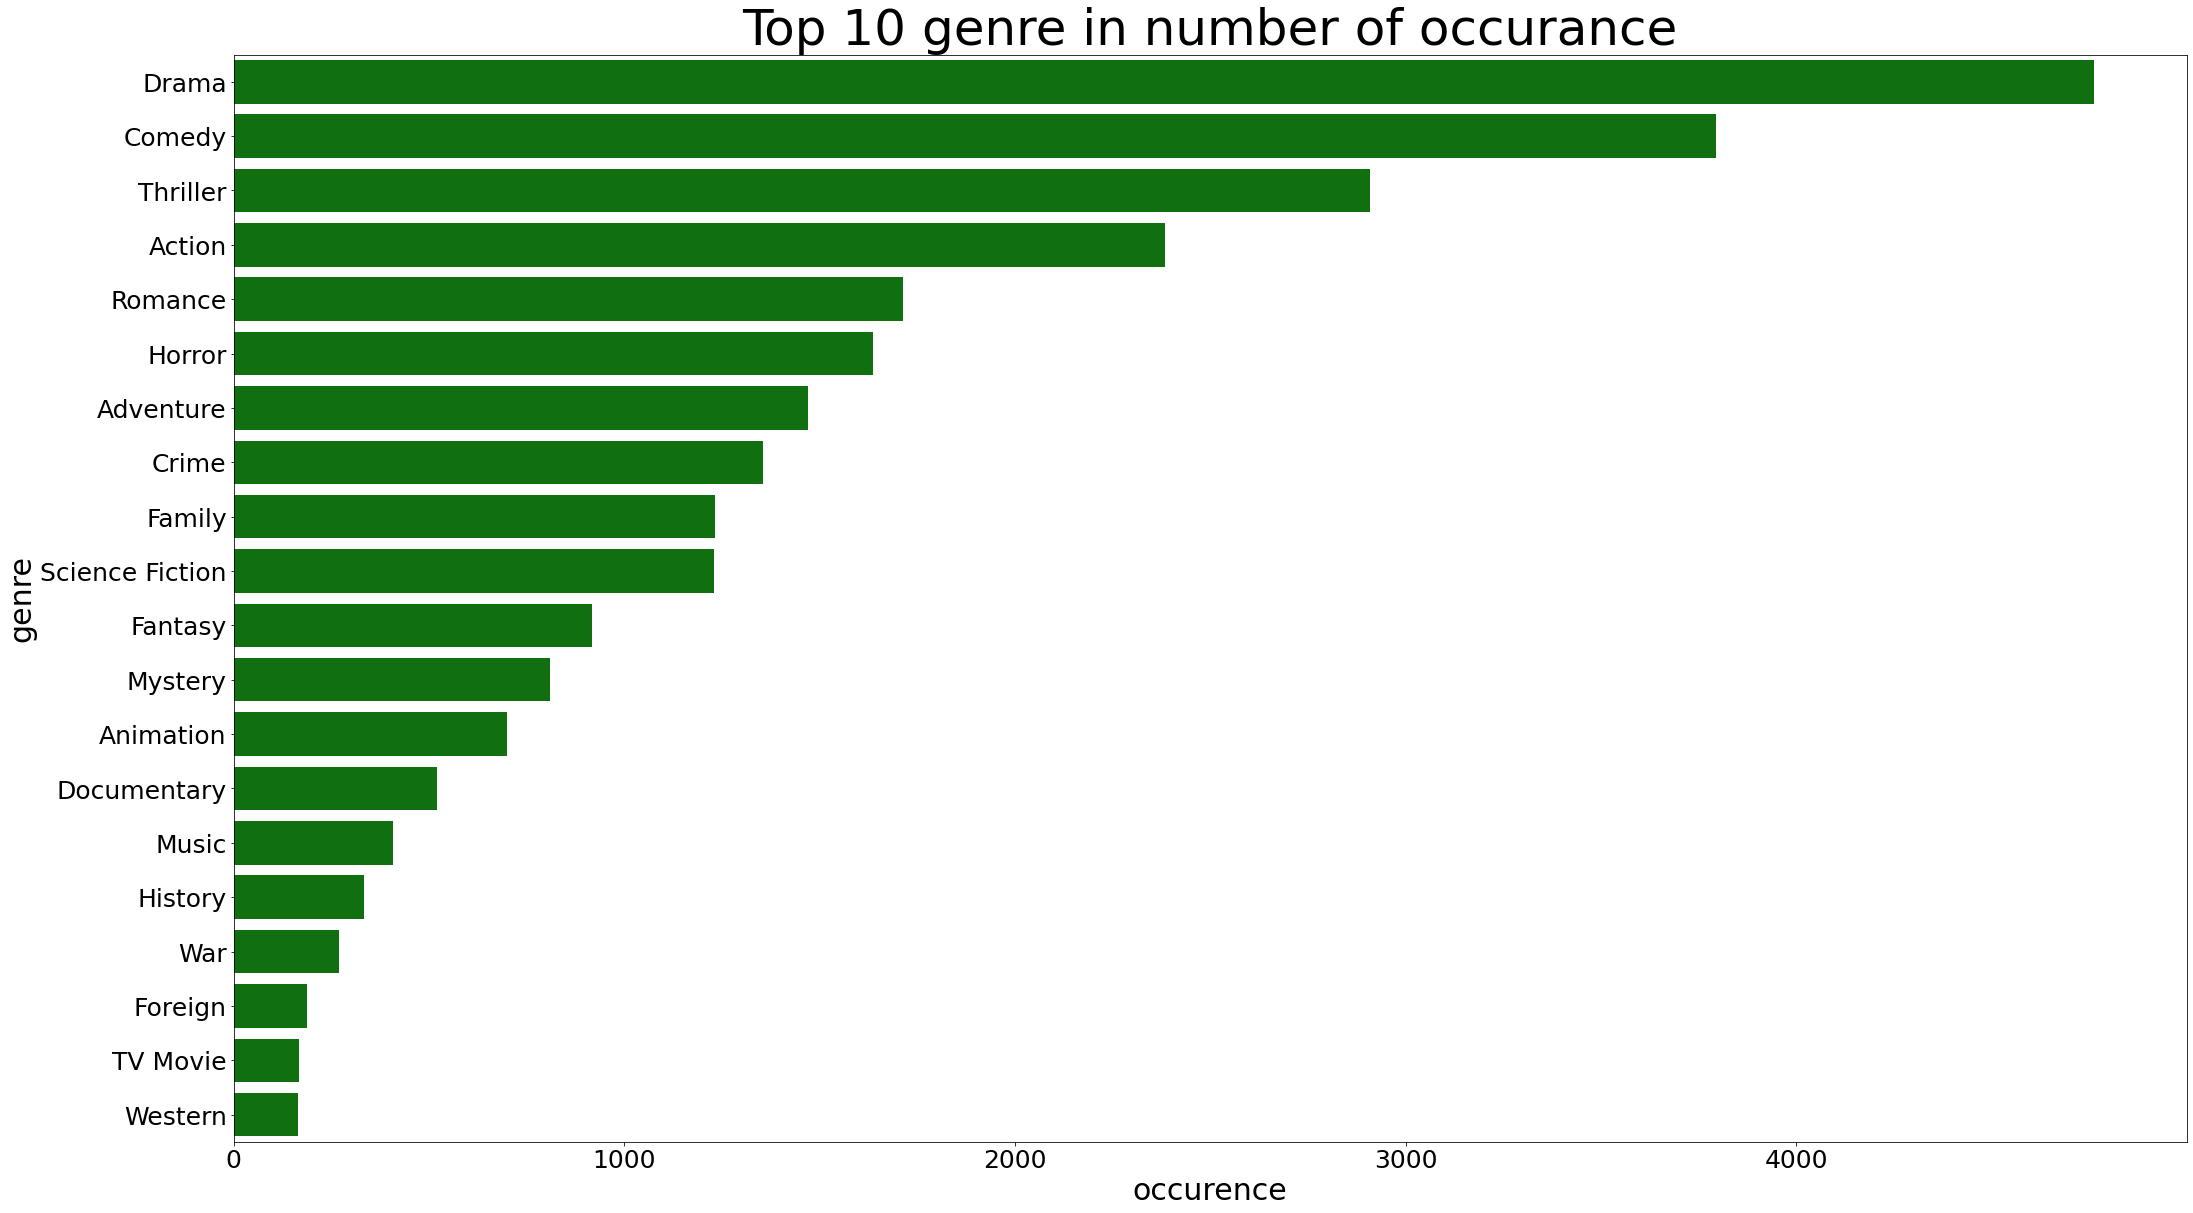

In [26]:
# extracting genres with highest features
genre_occurences = Counter(list('|'.join(genres_rows).split('|')))
genre_occurences_df = pd.DataFrame(genre_occurences.items(), columns=['genre_name', 'no_features'])
top_10_genre_occurences = genre_occurences_df.sort_values('no_features',ascending=False)


#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
b = sns.barplot(x = 'no_features',y = 'genre_name',data = top_10_genre_occurences,ax=ax,color='green')
b.axes.set_title("Top 10 genre in number of occurance",fontsize=50)
b.set_xlabel("occurence",fontsize=30)
b.set_ylabel("genre",fontsize=30)
b.tick_params(labelsize=25)
plt.show()

### Research Question 6  (Top 10 companies in terms of movie production)

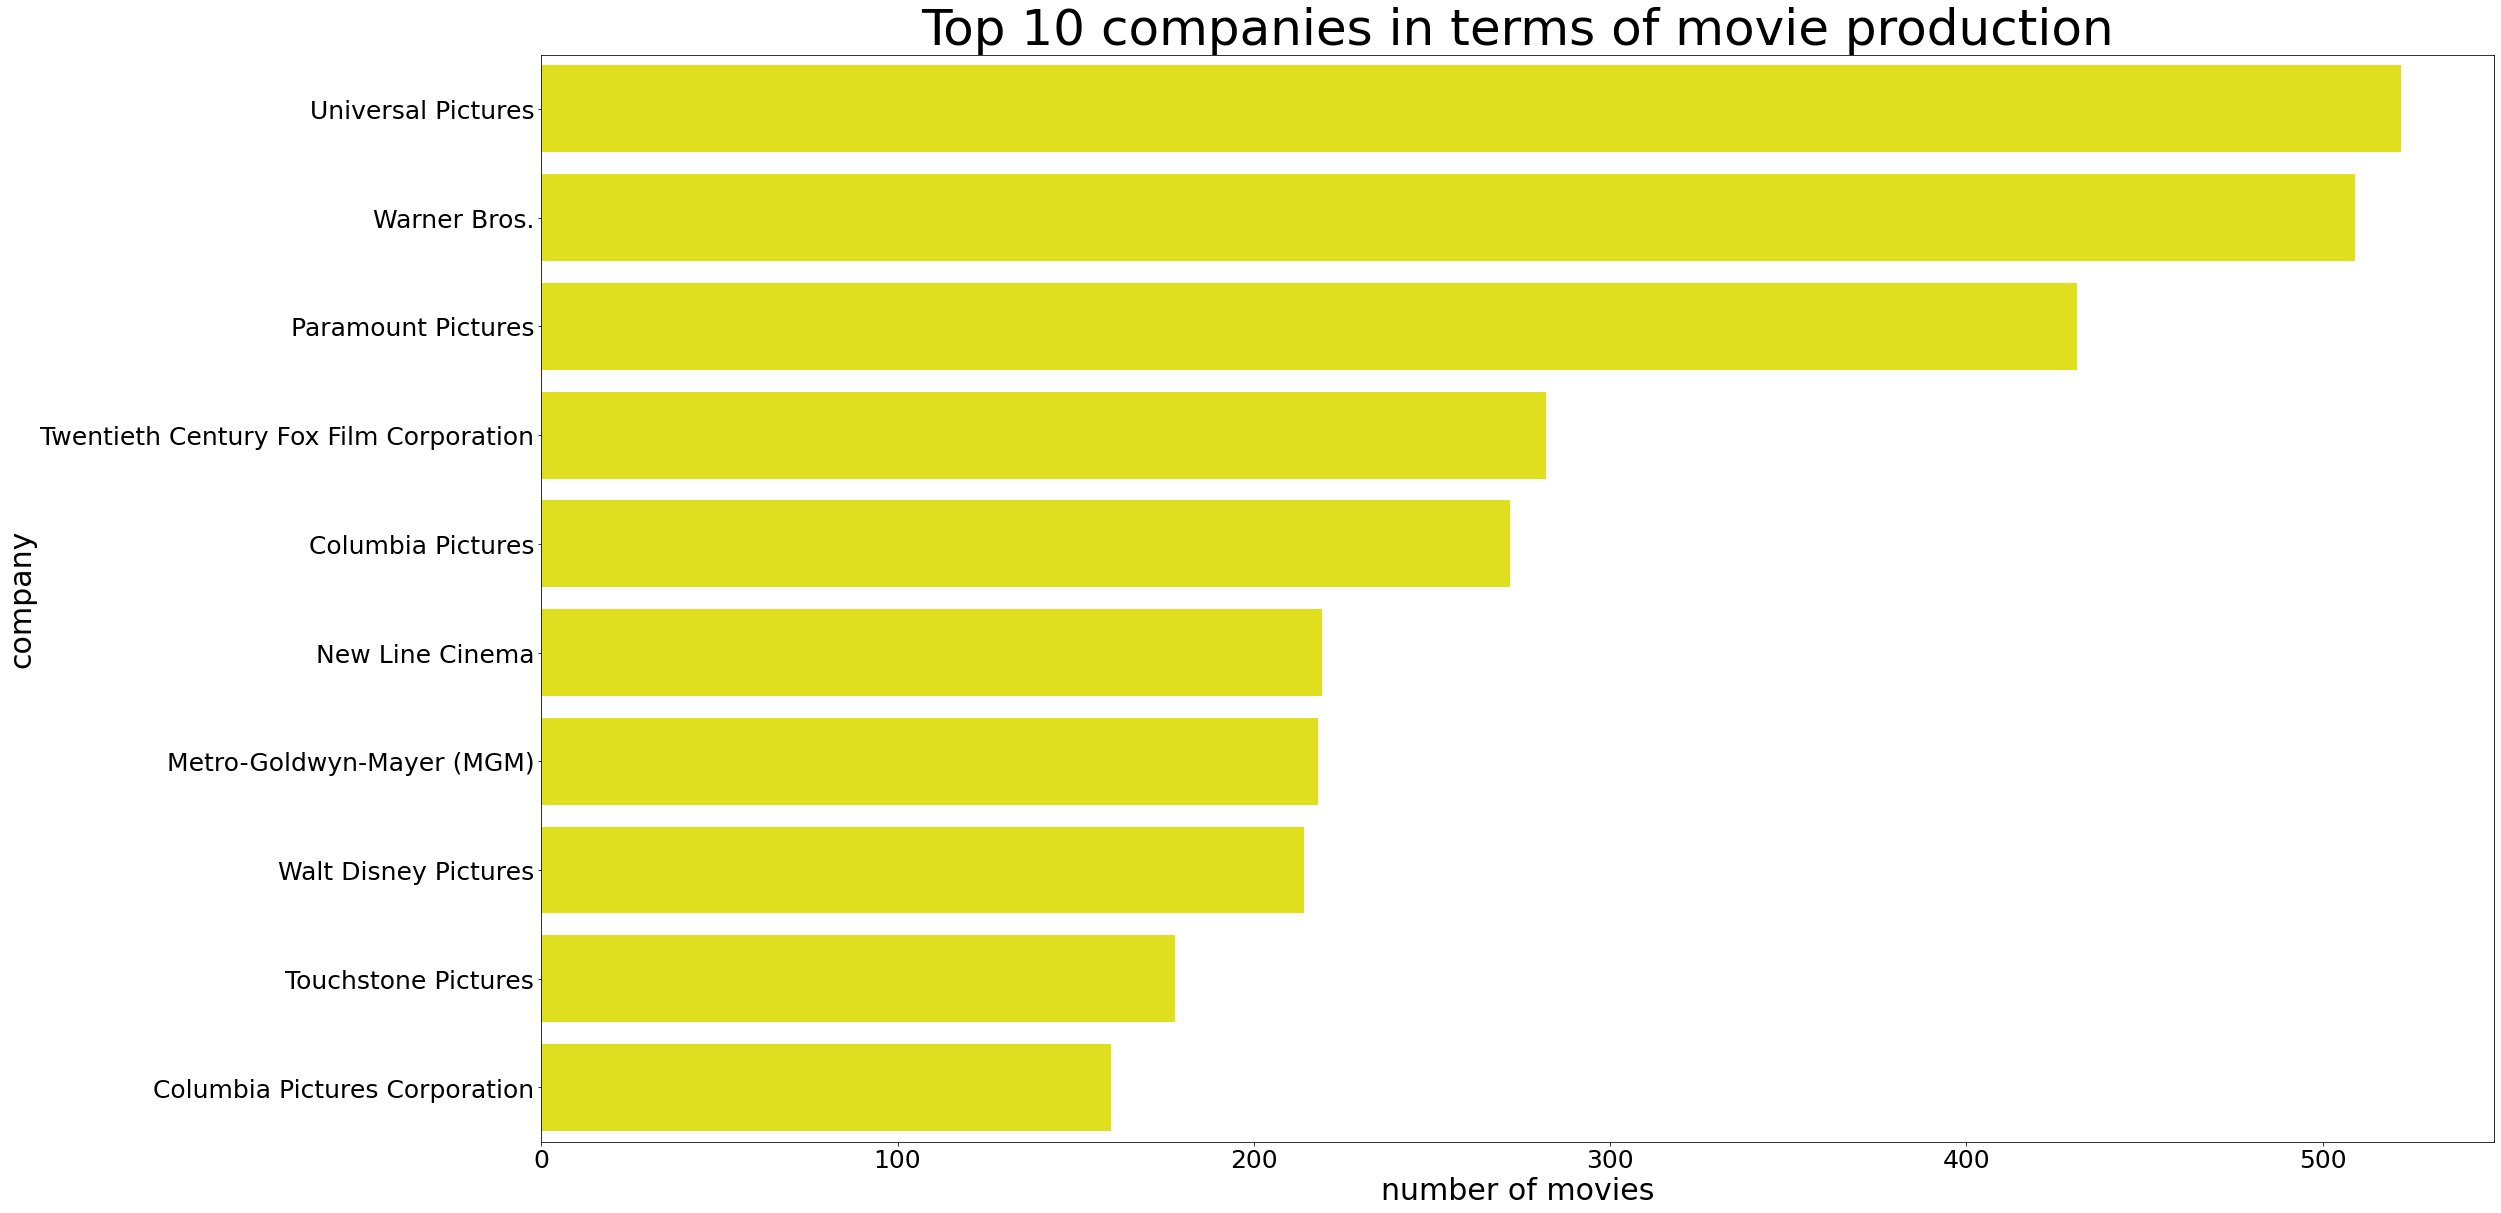

In [27]:
# extracting genres with highest features
production_companies = Counter(list('|'.join(production_companies_rows).split('|')))
production_companies_df = pd.DataFrame(production_companies.items(), columns=['company', 'no_of_movies'])
top_10_production_companies = production_companies_df.sort_values('no_of_movies',ascending=False).head(10)


#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
b = sns.barplot(x = 'no_of_movies',y = 'company',data = top_10_production_companies,ax=ax,color='yellow')
b.axes.set_title("Top 10 companies in terms of movie production",fontsize=50)
b.set_xlabel("number of movies",fontsize=30)
b.set_ylabel("company",fontsize=30)
b.tick_params(labelsize=25)
plt.show()

### Research Question 7  (Top 10 directors in terms of number movie production)

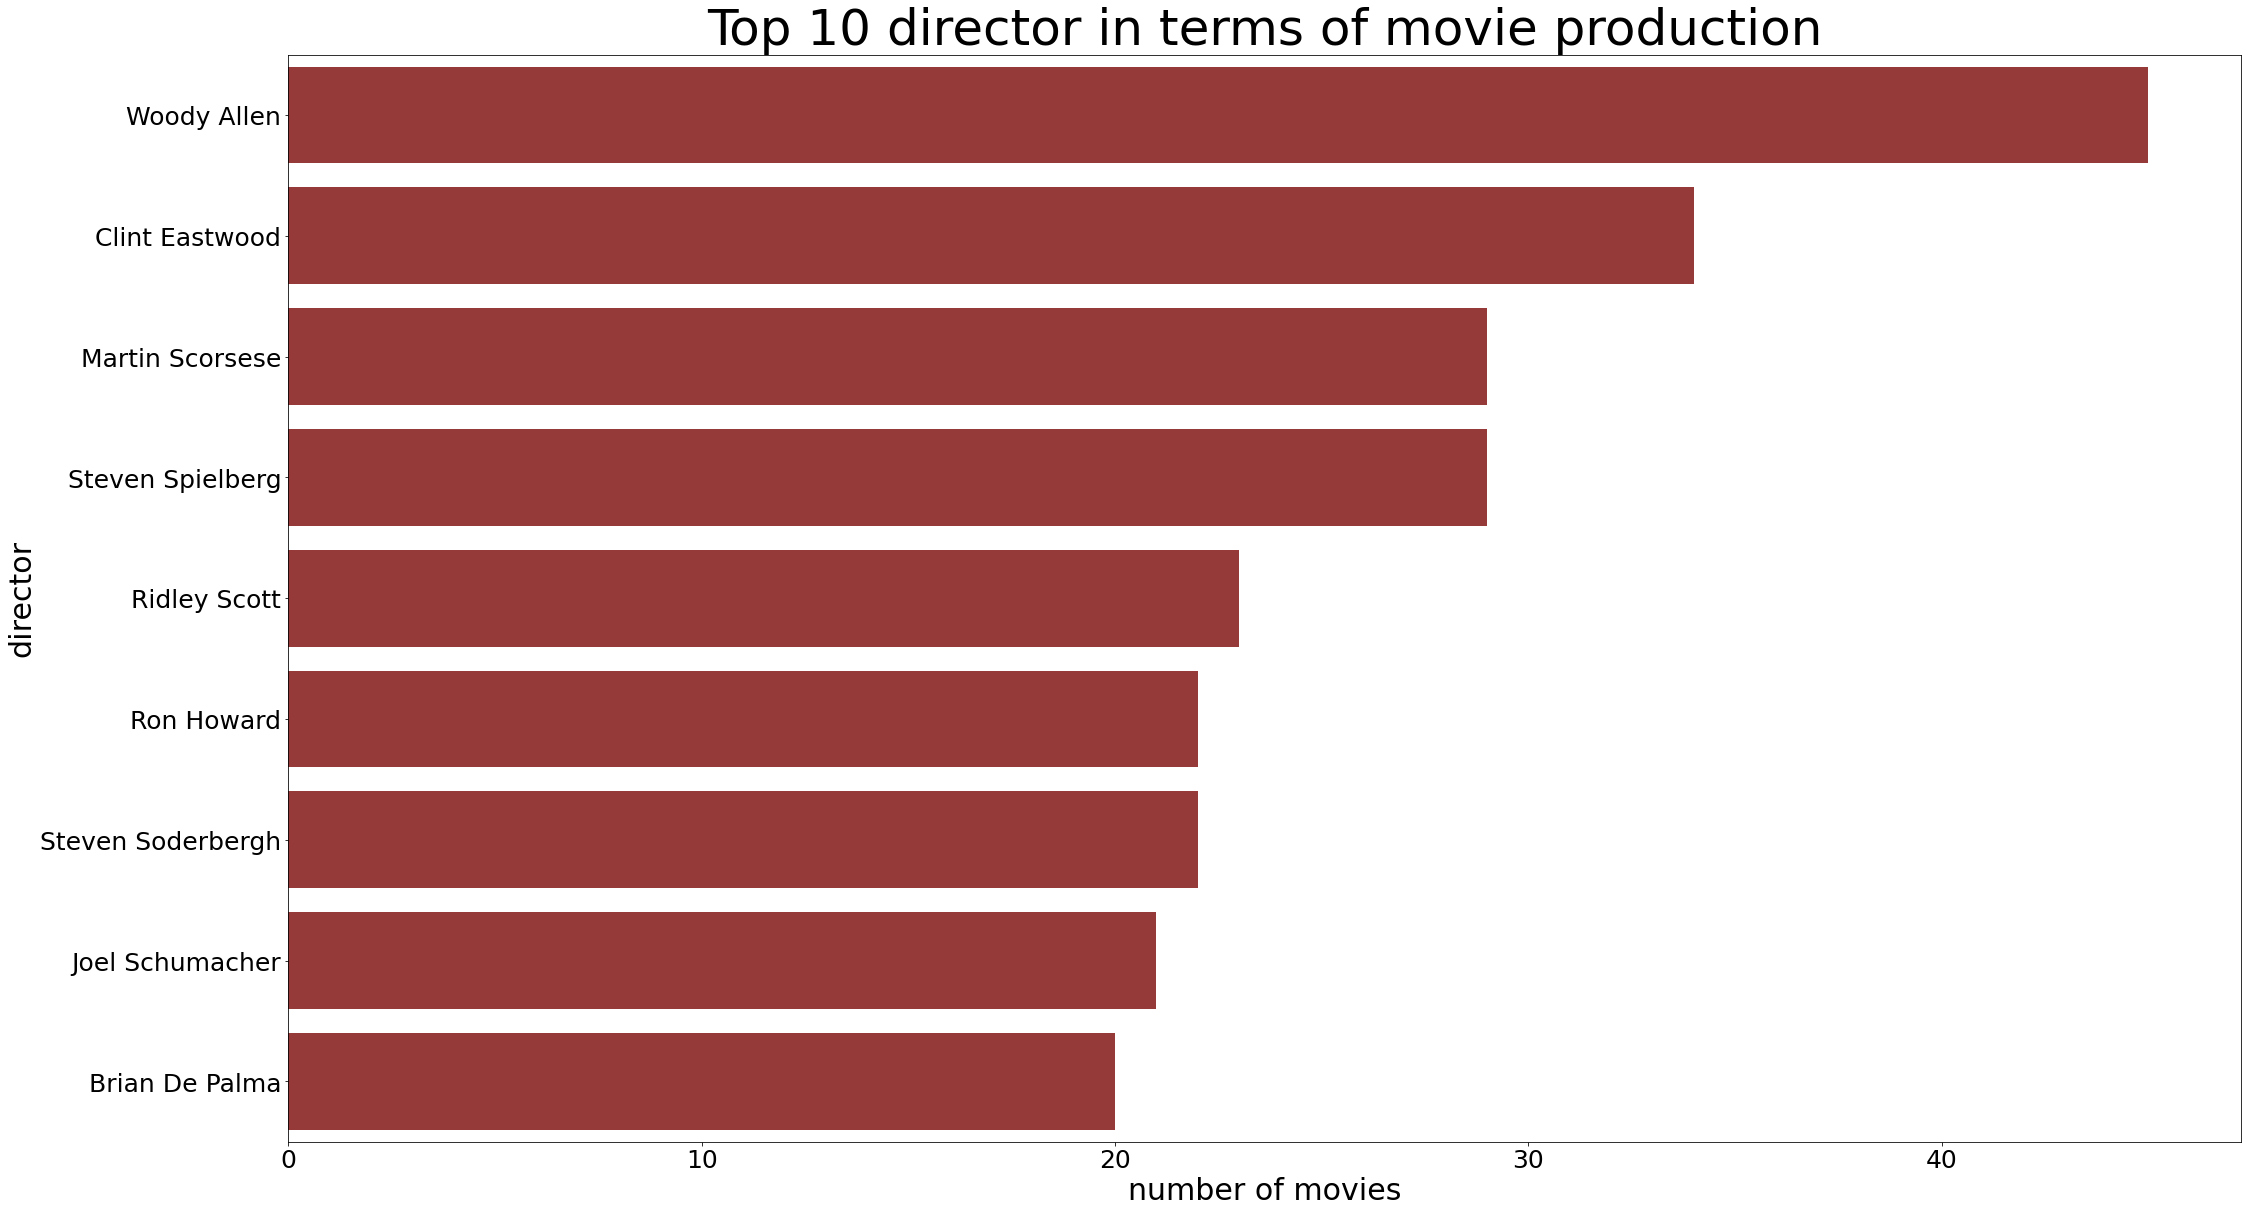

In [47]:
# extracting genres with highest features
movie_director = Counter(list(data.director))
movie_director_df = pd.DataFrame(movie_director.items(), columns=['director', 'no_of_movies'])
top_10_movie_director = movie_director_df.sort_values('no_of_movies',ascending=False).head(10)


#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
b = sns.barplot(x = 'no_of_movies',y = 'director',data = top_10_movie_director,ax=ax,color='brown')
b.axes.set_title("Top 10 director in terms of movie production",fontsize=50)
b.set_xlabel("number of movies",fontsize=30)
b.set_ylabel("director",fontsize=30)
b.tick_params(labelsize=25)
plt.show()

<AxesSubplot:ylabel='director'>

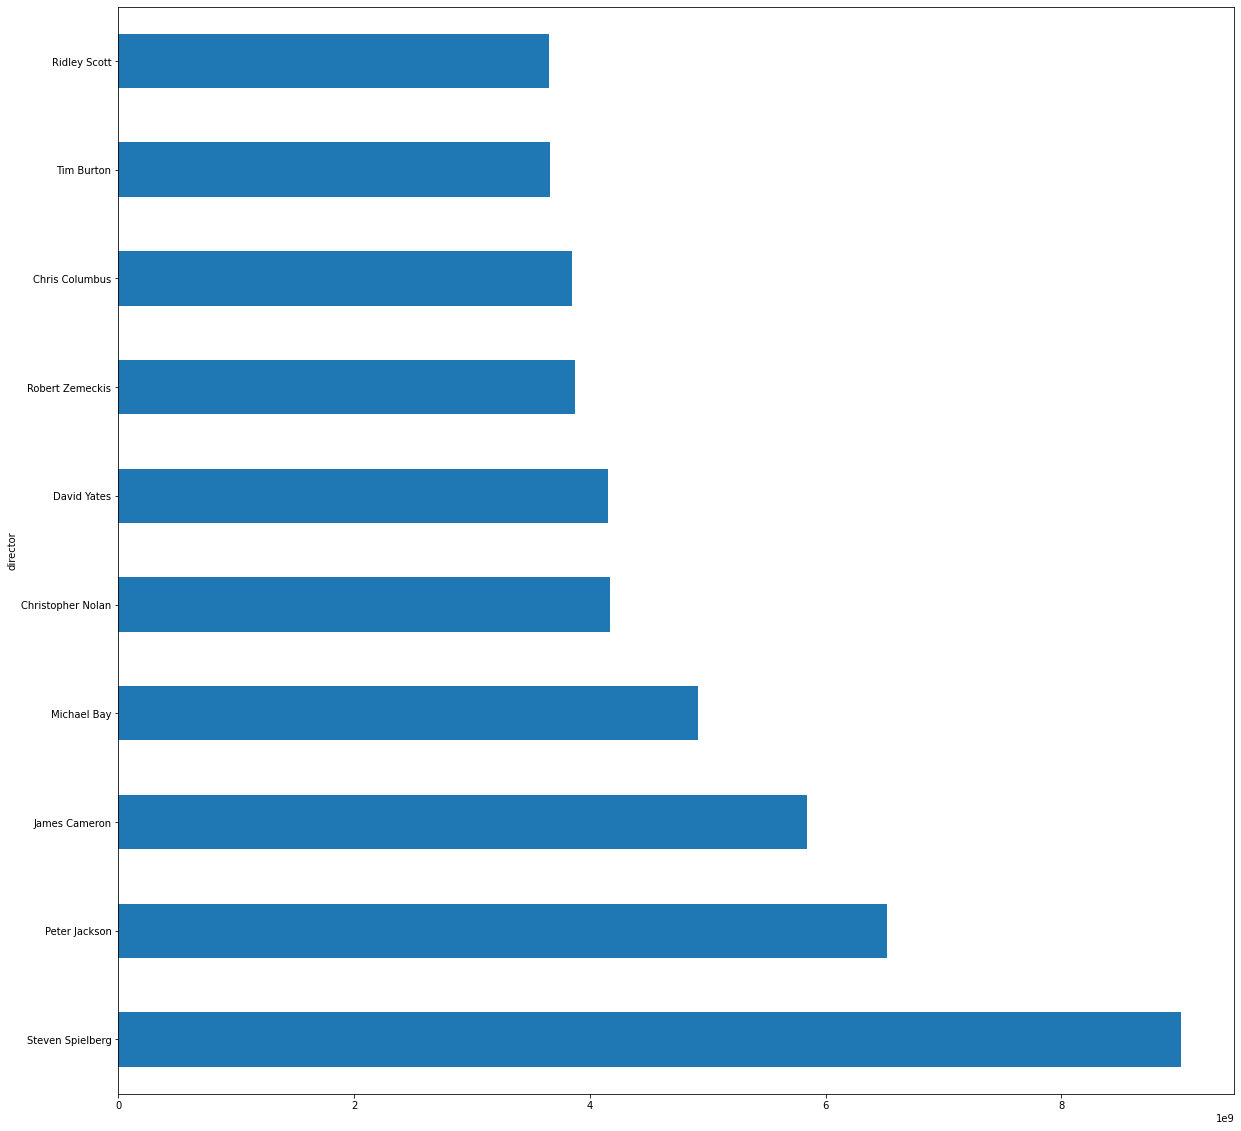

In [59]:
fig, ax = plt.subplots(figsize=(20,20)) 
data.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot.barh(ax=ax)

### Research Question 8  (changes in revenue/budget across the years)

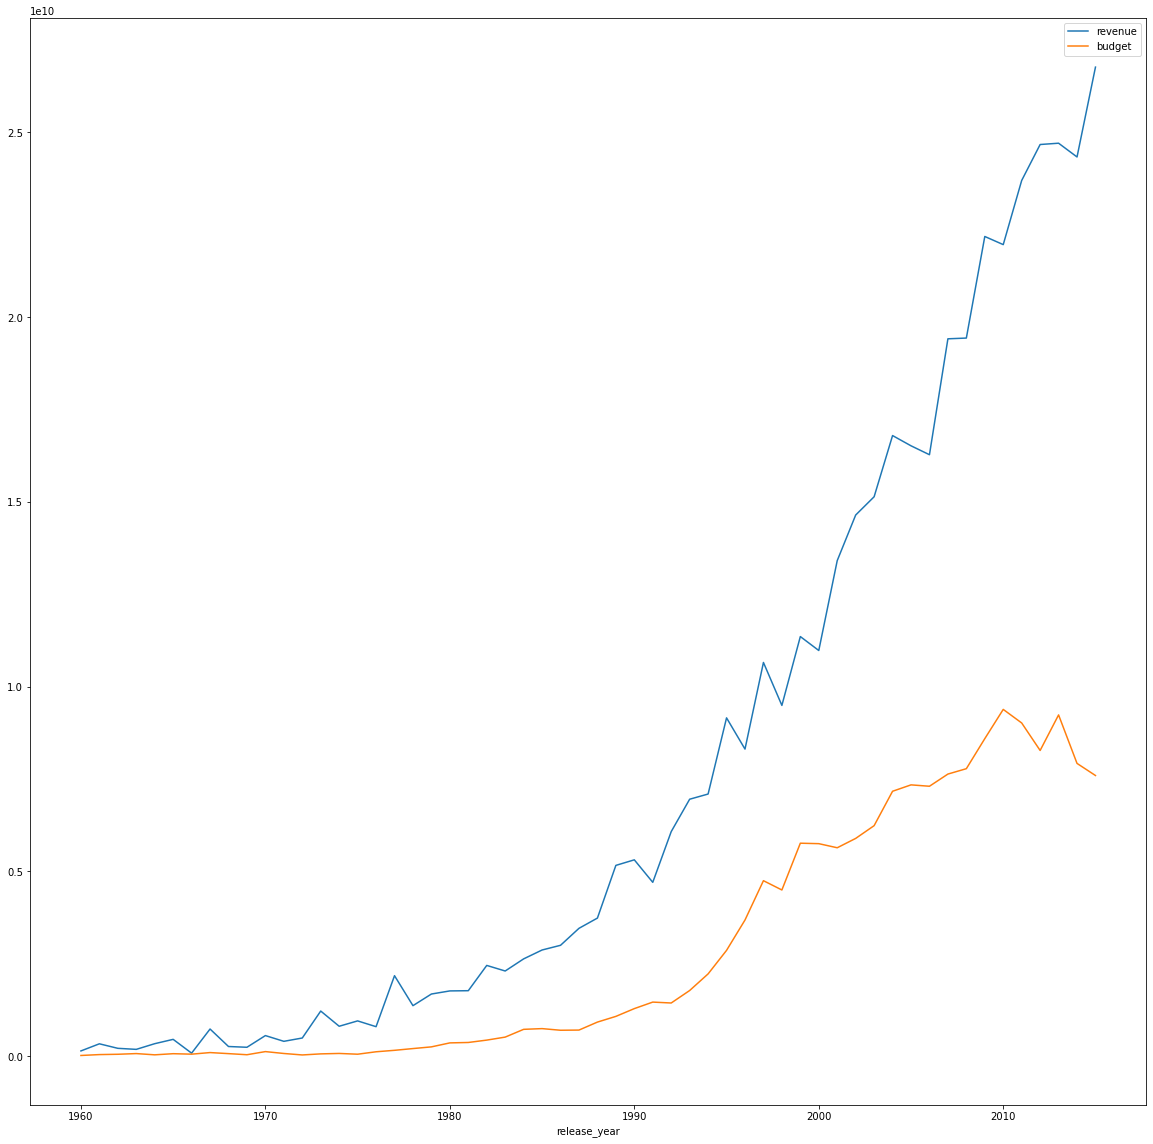

In [28]:
fig, ax = plt.subplots(figsize=(20,20)) 
data.groupby('release_year')[['revenue','budget']].sum().plot(ax=ax);

### Research Question 9 (number of release movies across the years)

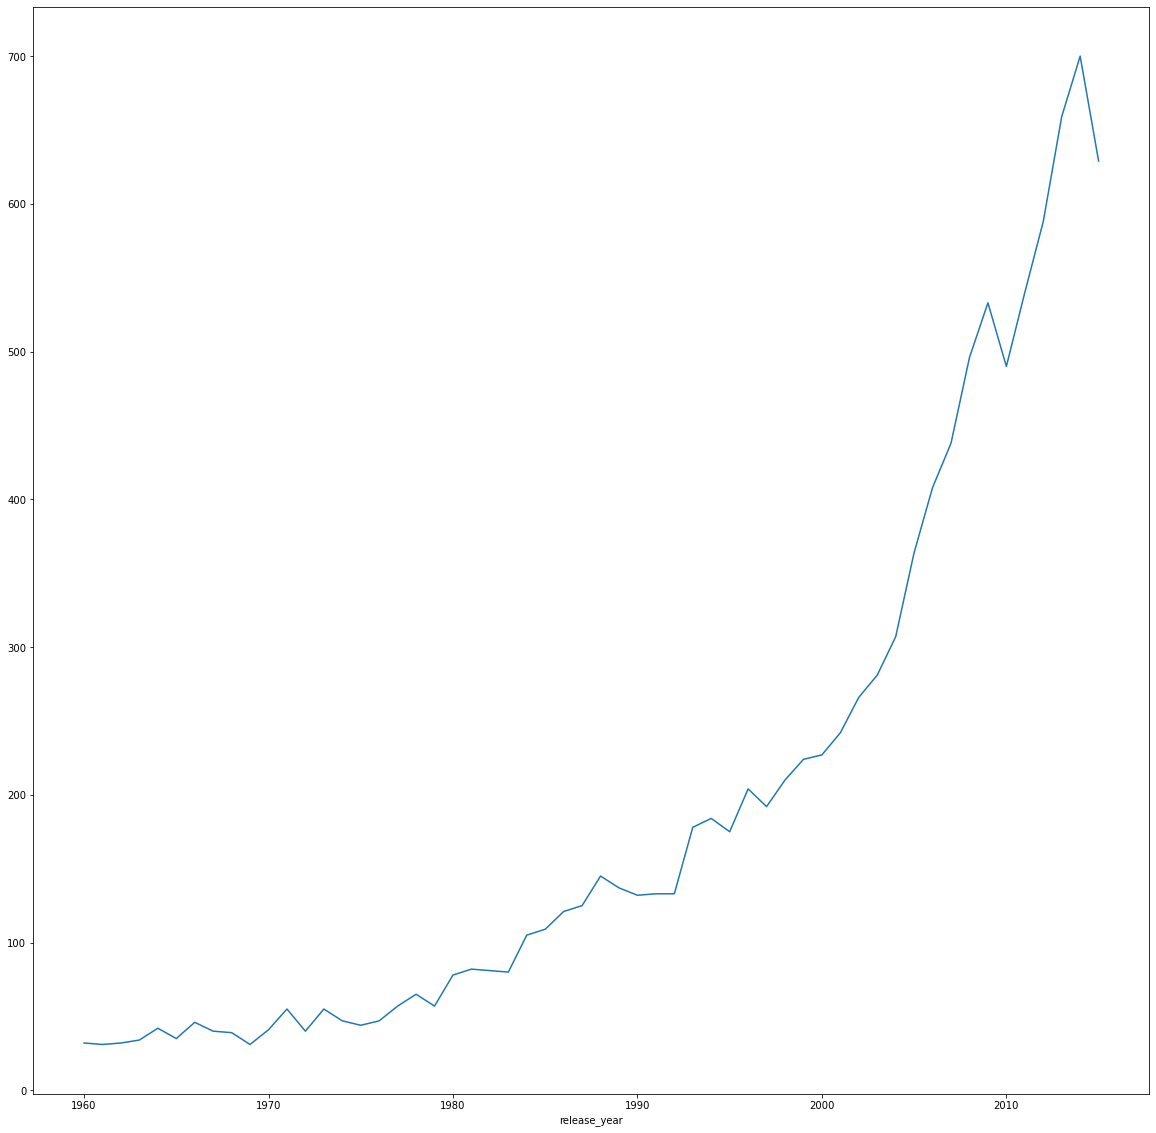

In [29]:
fig, ax = plt.subplots(figsize=(20,20)) 
data.groupby('release_year')['release_year'].count().plot(ax=ax);

### Research Question 10  (average popularity/average vote based on release month)

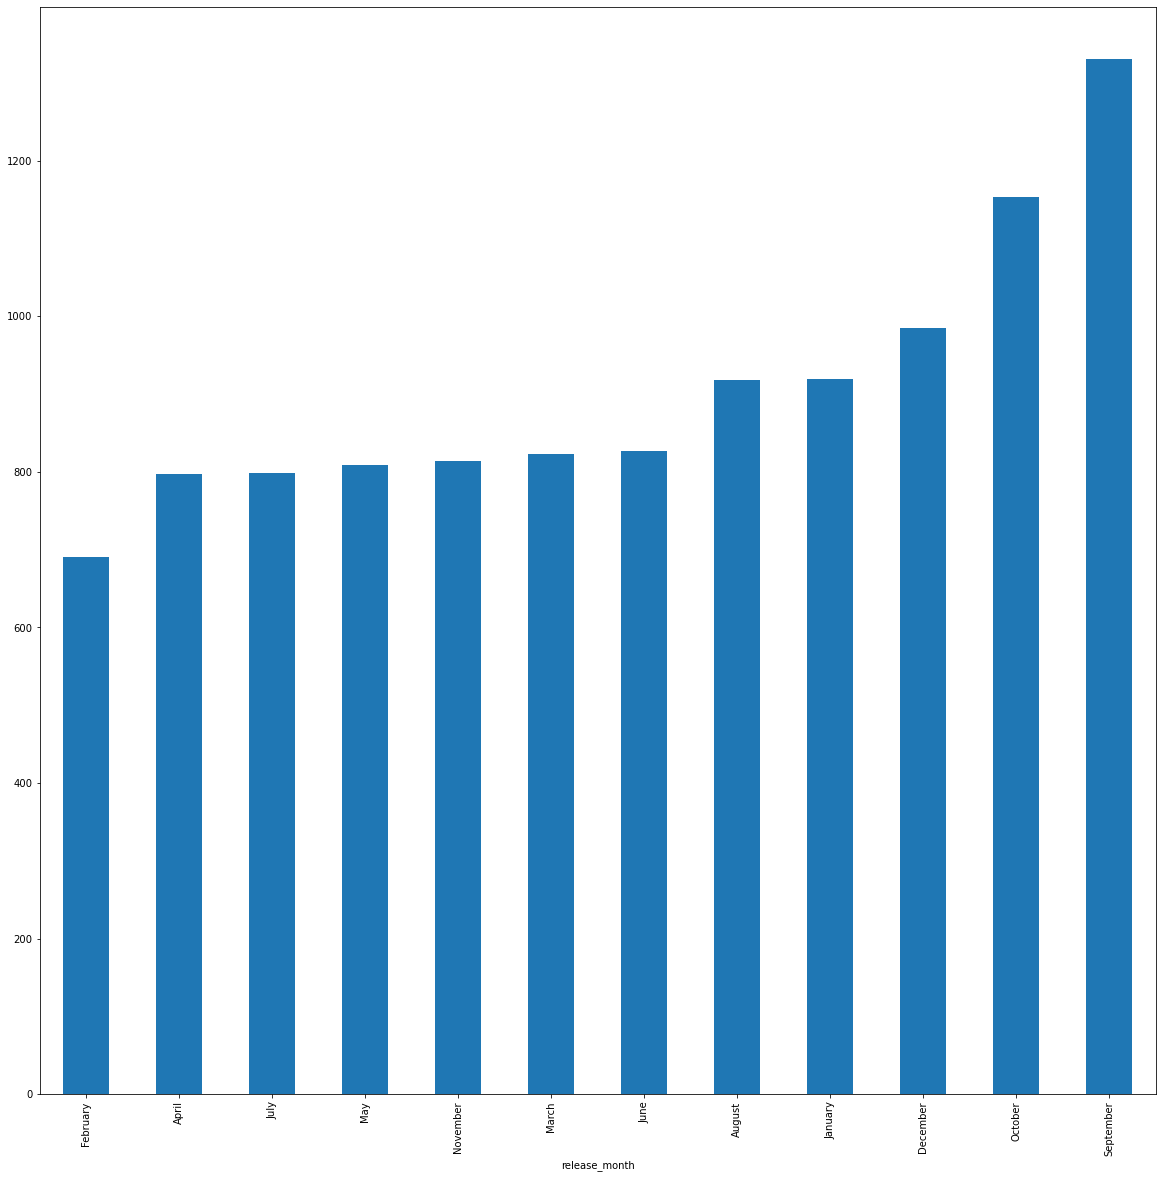

In [40]:
fig, ax = plt.subplots(figsize=(20,20)) 
data.groupby('release_month')['release_month'].count().sort_values().plot.bar(ax=ax);

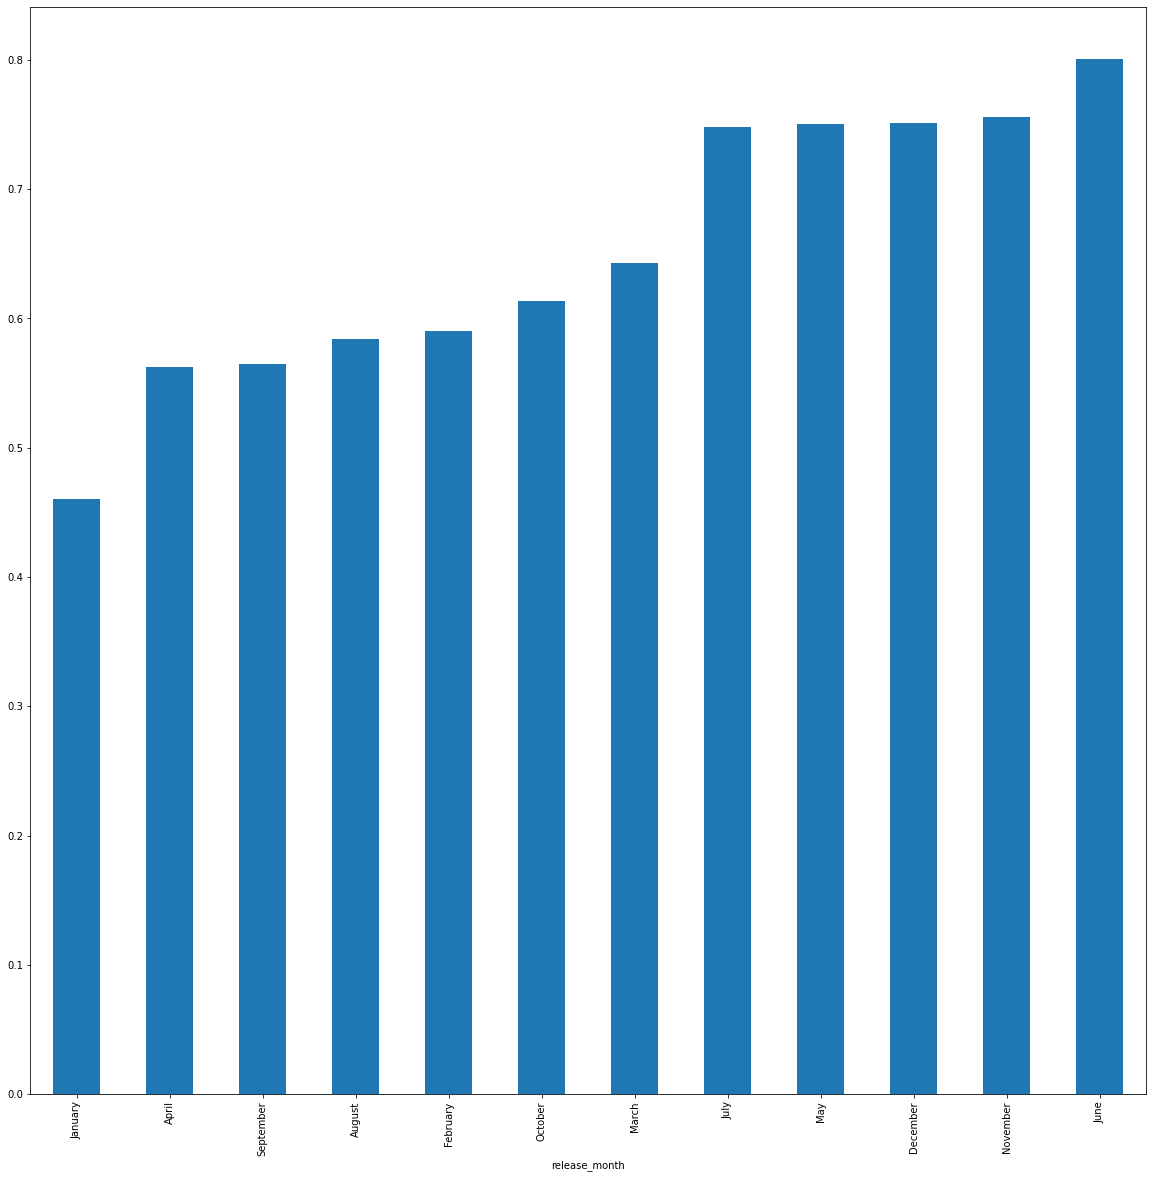

In [41]:
fig, ax = plt.subplots(figsize=(20,20)) 
data.groupby('release_month')['popularity'].mean().sort_values().plot.bar(ax=ax);

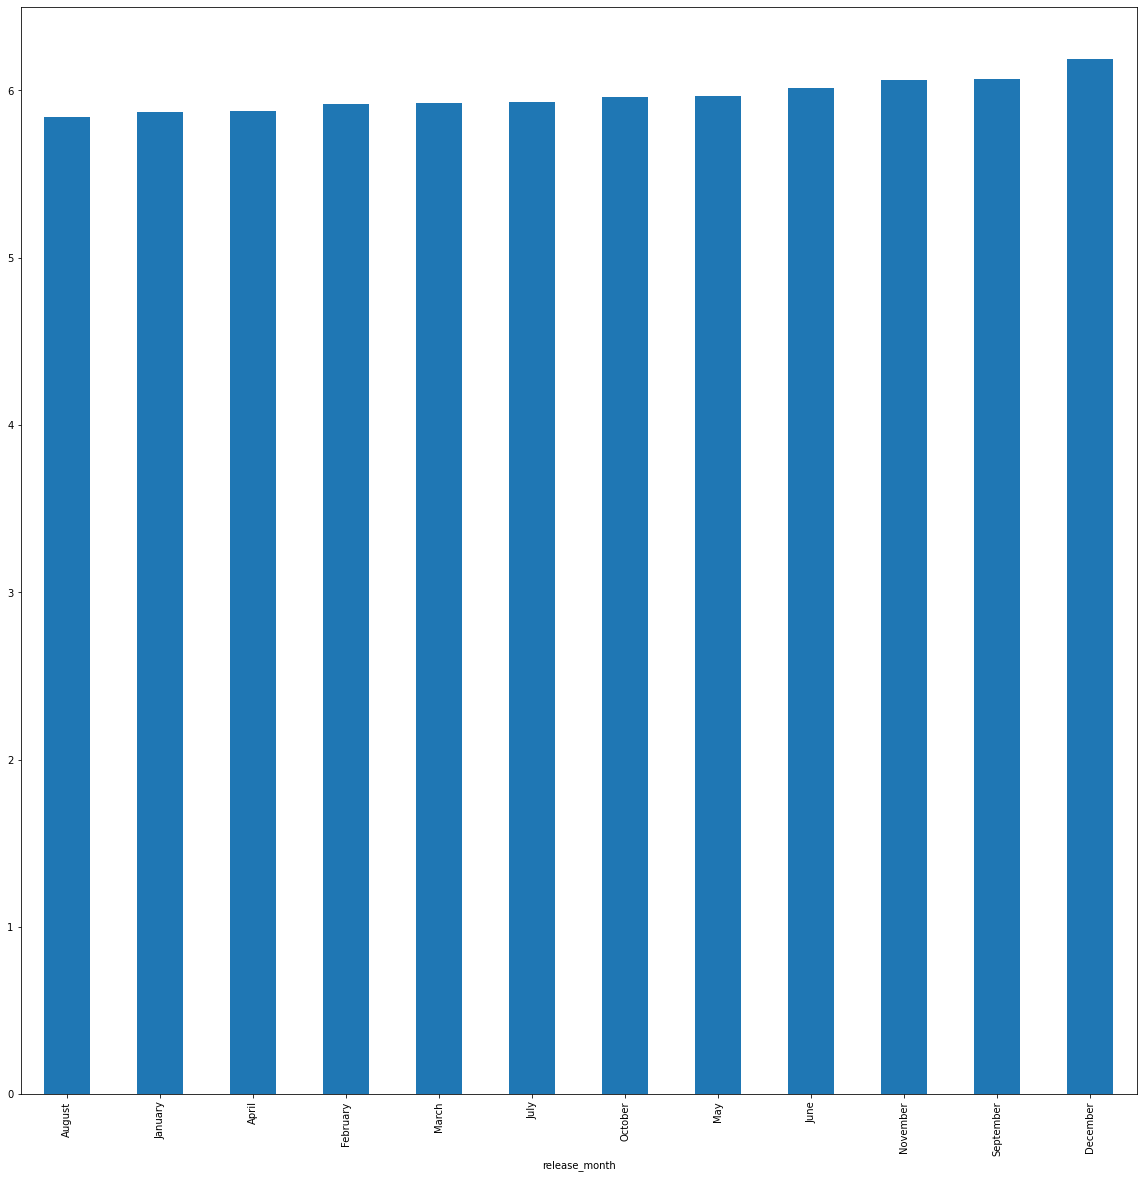

In [42]:
fig, ax = plt.subplots(figsize=(20,20)) 
data.groupby('release_month')['vote_average'].mean().sort_values().plot.bar(ax=ax);

<a id='conclusions'></a>
## Conclusions

> **Insight_1**:  The dataset contains large number of outliers, features that shows high volume of outliers are popularity, vote count and runtime.

> **Insight_2**:  In terms of distribution vote average shows normal distribution with slight left skewness while the remaining features are skewed to the left.

> **Insight_3**: In terms of correlation

            * Vote count vs budget shows positive correlation 
            * Popularity vs vote count shows positive correlation
            * Revenue vs budget, vote count, popularity shows positive correlation
            

> **Insight_4**: **55%** of the movie have no information about the revenue.

> **Insight_5**: In terms of revenue generation for each movie **Avatar** topped the chart with highest generated revenue during the time period of this survey.

> **Insight_6**: **Robert de Nero** featured in the highest number of movies between this period of the survey.

> **Insight_8**: **Drama** genre came out as the most popular genre across the different movies associated with this survey during the period of the survey

> **Insight_9**: **Universal Picture** topped the company chart for the highest production made during this period while for the directors chart **Wooden Allen** directed majority of the movies.

> **Insight_10**: From the analysis based on revenue generation **Ridley Scott** topped the chart for the director that directed movies that generated the highest revenue(sum of all movies directed)

> **Insight_11**: Over the years the analysis made us understand that a progressive increase in budget and revenue of movies produced during this time of the survey was recorded with little budget decline around the later years of the survey.

> **Insight_12**: From the analysis the amount of movie released increased with a sharp increase between 2000 and 2010 and a little regression around 2013 – 2015

> **Insight_13**: The last 4 month of the year is usually associated with large release of movies and also in terms of movie popularity, movies released during this period are associated with large popularity  